1.7174040173890401
1.1764705882352942


ValueError: x and y must have same first dimension, but have shapes (51,) and (1326,)

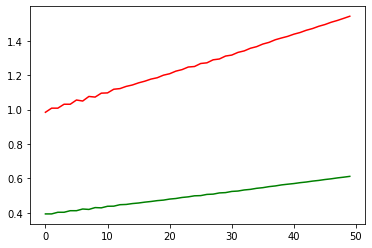

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

K0 = 1000
A0 = 500
L0 = 1.7
d = 0.15
s = 0.4
l = 0.1
n = 0.1
z = 1/500
alpha = 1/3
g= 0.01

time = 0

def L(L0, n, time):
    return L0 * (1 + n)**(time)

def A(L0, g, time):
    return A0 * (1 + g)**(time)

def output_per_person(l, alpha, capital_per_person):
    return (1 - l) ** (1 - alpha) * (capital_per_person) ** (alpha)

# g = [z * l * L(L0, n, time)]
population = [L0]
knowledge = [A0]
capital_p = [K0/(knowledge[0] * population[0])]
output_p = [output_per_person(l, alpha, capital_p[0])]
investment = [s * output_p[0]]
depreciation = [(d + g + n) * capital_p[0]]
change_in_capital = [investment[0] - depreciation[0]]
i = 0

k_star = [(1 - l) * pow(s / (d + g + n), 1 / (1-alpha))]

# i < len(g)
# while (abs(capital_p[i] - k_star[i])) > 0.1:
for i in range(0, 50):
    time = np.append(time, i)
    g = np.append(g, z * l * population[i])
    k_star = np.append(k_star, (1 - l) * (s/(d + g + n)**(1/(1 - alpha))))
    capital_p = np.append(capital_p, capital_p[i - 1] + change_in_capital[i - 1])
    population = np.append(population, L(L0, n, time[i]))
    knowledge = np.append(knowledge, A(A0, g, time[i]))
    output_p = np.append(output_p,output_per_person(l, alpha, capital_p[i]))
    investment = np.append(investment, s * output_p[i])
    depreciation = np.append(depreciation, (d + g + n) * capital_p[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])
    i += 1
    
# print(len(time))
print(k_star[0])
print(capital_p[0])

plt.plot(time, output_p, 'red')
plt.plot(time, investment, 'green')
plt.plot(time, depreciation, 'black')
plt.xlim(0, i)
plt.show()

[0.60719401 1.35772709 1.35772709 1.35772709 1.34993154 1.34144223
 1.33220628 1.32216852 1.31127176 1.29945715 1.28666463 1.27283352
 1.25790323 1.24181412 1.22450851 1.20593181 1.18603388 1.1647705
 1.14210494 1.11800973 1.09246841 1.0654774  1.03704778 1.00720698
 0.97600033 0.94349227 0.90976722 0.87493004 0.83910583 0.80243921
 0.76509292 0.72724569 0.68908953 0.65082636 0.61266418 0.57481285
 0.5374797  0.50086513 0.46515836 0.43053358 0.39714664 0.36513232
 0.33460249 0.30564493 0.27832305]
45


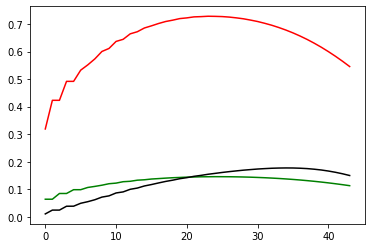

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

K0 = 100
A0 = 50
L0 = 50
d = 0.15
s = 0.2
l = 0.1
n = 0.1
z = 1/500
alpha = 1/3

time = 0

def L(L0, n, time):
    return L0 * (1 + n)**(time)

def A(L0, g, time):
    return A0 * (1 + g)**(time)

# def output_per_person(l, alpha, capital, knowledge, population):
#    return (1 - l) ** (1 - alpha) * (capital)** (alpha) * (1 / (knowledge * population)) ** (alpha)

def output_per_person(l, alpha, capital_per_person):
    return (1 - l) ** (1 - alpha) * (capital_per_person)** (alpha)

g = [z * l * L(L0, n, time)]
population = [L0]
knowledge = [A0]
# capital = [K0]
capital_p = [K0/(knowledge[0] * population[0])]
output_p = [output_per_person(l, alpha, capital_p[0])]
# output_p = [output_per_person(l, alpha, capital[0], knowledge[0], population[0])]
investment = [s * output_p[0]]
# depreciation = [(d + g[0] + n) * (capital_p[0] / (knowledge[0] * population[0]))]
depreciation = [(d + g[0] + n) * capital_p[0]]
change_in_capital = [investment[0] - depreciation[0]]
i = 0

k_star = [(1 - l) * pow(s / (d + g[0] + n), 1 / (1 - alpha))]

# i < len(g)
while (abs(capital_p[i] - k_star[i])) > 0.1:
# for i in range(0, 30):
    time = np.append(time, i)
    g = np.append(g, z * l * L(L0, n, time[i]))
    k_star = np.append(k_star, (1 - l) * (s/(d + g[i] + n)**(1/(1 - alpha))))
    capital_p = np.append(capital_p, capital_p[i - 1] + change_in_capital[i - 1])
#    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1])
    population = np.append(population, L(L0, n, time[i]))
    knowledge = np.append(knowledge, A(A0, g[i], time[i]))
    output_p = np.append(output_p,output_per_person(l, alpha, capital_p[i]))
#    output_p = np.append(output_p,output_per_person(l, alpha, capital[i], knowledge[i], population[i]))
    investment = np.append(investment, s * output_p[i])
#    depreciation = np.append(depreciation, (d + g[i] + n) * (capital[i] / (knowledge [i] * population[i])))
    depreciation = np.append(depreciation, (d + g[i] + n) * capital_p[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])
    i += 1
    
# print(len(time))
print(k_star)
print(len(g))

plt.plot(time, output_p, 'red')
plt.plot(time, investment, 'green')
plt.plot(time, depreciation, 'black')
plt.show()

21


ValueError: x and y must have same first dimension, but have shapes (21,) and (231,)

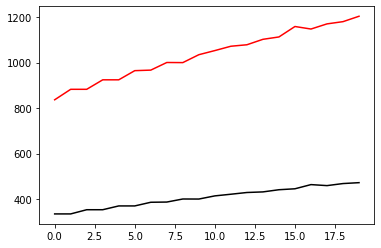

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

K0 = 1000
A0 = 500
L0 = 1.7
d = 0.15
s = 0.4
l = 0.1
n = 0.00
z = 1/500
alpha = 1/3
g = 0.01

def sr_function_output(l, K, alpha, A, L):
    return (1 - l)**(1 - alpha) * K**(alpha) * (A * L)**(1 - alpha)
 
def L(L0, n, time):
    return L0 * (1 + n)**(time)

def A(A0, g, time):
    return A0 * (1 + g)**(time)

time = 0
# g = [z * l * L(L0, n, time)]
capital = [K0]
population = [L0]
knowledge = [A0]
output = [sr_function_output(l, capital[0], alpha, knowledge[0], population[0])]
investment = [s * output[0]]
depreciation = [(d + g + n) * capital[0]]
change_in_capital = [investment[0] - depreciation[0]]
i = 0

K_star = [(1 - l) * (s/(d+g+n))**(1/(1 - alpha)) * knowledge[0] * population[0]]

# while (abs(capital[i] - K_star[i])) > 1:
for i in range(0, 20):
    time = np.append(time, i)
    g = np.append(g, z * l * population[i])
    K_star = np.append(K_star, (1 - l) * (s/(d+g+n))**(1/(1 - alpha)) * knowledge[i] * population[i])
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1])
    population = np.append(population, L(L0, n, time[i]))
    knowledge = np.append(knowledge, A(A0, g, time[i]))
    output = np.append(output, sr_function_output(l, capital[i], alpha, knowledge[i], population[i]))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, (d + g + n) * capital[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])
#    i += 1

# Y_star = (a - l) * (s / (d + g[i] + n))**(alpha / (1 - alpha)) * knowledge[i] * population[i]
# print(output[110])
print(len(time))

plt.plot(time, output, 'red')
plt.plot(time, investment, 'black')
plt.plot(time, depreciation, 'yellow')
plt.yscale("log")
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

K0 = 1000
L0 = 500
A0 = 1.7
n = 0
g = 0.01
s = 0.1
d = 0.06
alpha = 0.33
l = 0.01

def sr_function_output(l, K, alpha, A, L):
    return (1 - l)**(1 - alpha) * K**(alpha) * (A * L)**(1 - alpha)
 
def L(L0, n, time):
    return L0 * (1 + n)**(time)

def A(A0, g, time):
    return A0 * (1 + g)**(time)

time = 0

capital = [K0]
population = [L0]
knowledge = [A0]
output = [sr_function_output(l, K0, alpha, A0, L0)]
investment = [s * output[0]]
depreciation = [(d + g +n) * capital[0]]
change_in_capital = [investment[0] - depreciation[0]]
i = 0

K_star = np.array([(1 - l) * (s/(d+g+n))**(1/(1 - alpha)) * A(A0, g, time) * L(L0, n, time)])

while (abs(capital[i] - K_star[i])) > 1:
    time = np.append(time, i)
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1])
    K_star = np.append(K_star, (1 - l) * (s/(d+g+n))**(1/(1 - alpha)) * A(A0, g, time[i]) * L(L0, n, time[i]))
    population = np.append(population, L(L0, n, time[i]))
    knowledge = np.append(knowledge, A(A0, g, time[i]))
    output = np.append(output, sr_function_output(l, capital[i], alpha, knowledge[i], population[i]))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, (d + g + n) * capital[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])
    i += 1
  
print(len(time))

plt.plot(time, output, 'red')
plt.plot(time, investment, 'green')
plt.plot(time, depreciation, 'yellow')
plt.yscale("log")
plt.show()

KeyboardInterrupt: 